<a href="https://colab.research.google.com/github/jc5833/MachineLearning_Project/blob/main/vehicleDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports necessary modules that will be used.
import os
import time
import math
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# New Section

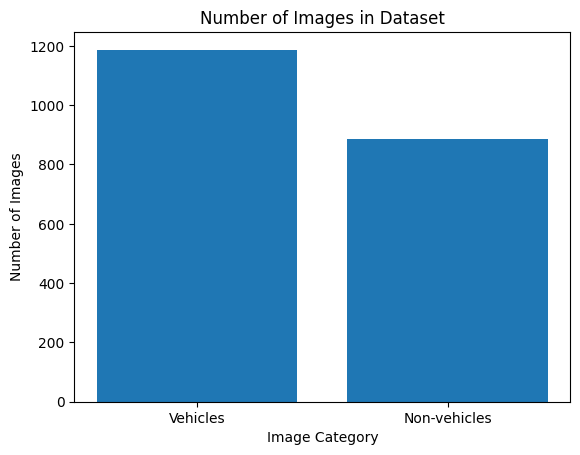

In [ ]:
# Initializes the variables with the paths to the directories with the images.
VEHICLES= '/content/data/vehicles'
NONVEHICLES= '/content/data/nonvehicles'
# Lists all the files in each directory
vehicleList1 = len(os.listdir(VEHICLES))
nonvehicleList1 =len( os.listdir(NONVEHICLES))

vehicleList = os.listdir(VEHICLES)
nonvehicleList = os.listdir(NONVEHICLES)
#prints the number of vehicle and nonvehicle images
plt.bar(['Vehicles', 'Non-vehicles'], [vehicleList1, nonvehicleList1])
plt.title('Number of Images in Dataset')
plt.xlabel('Image Category')
plt.ylabel('Number of Images')
plt.show()



In [ ]:
# Ensures there are no duplicates
vehicleList = list(set(vehicleList))
nonvehicleList = list(set(nonvehicleList))

In [ ]:
# Sets up file paths for training and testing data
Base = '/tmp/'
Train = os.path.join(Base, 'train')
Test = os.path.join(Base, 'test')

Vehicle_Train = os.path.join(Train, 'vehicles')
Nonvehicle_Train = os.path.join(Train, 'non-vehicles')

Vehicle_Test = os.path.join(Test, 'vehicles')
Nonvehicle_Test = os.path.join(Test, 'non-vehicles')

In [ ]:
# This is where the train and testing sets are split
train_size = .8

train_vehicles, test_vehicles = train_test_split(
    vehicleList, train_size=train_size, shuffle=True, random_state=1
)

train_non_vehicles, test_non_vehicles = train_test_split(
    nonvehicleList, train_size=train_size, shuffle=True, random_state=1
)

In [ ]:
# Moves the images from one directory to another
def move_images(image_list, old_dir_path, new_dir_path):
    if not os.path.exists(new_dir_path):
        os.makedirs(new_dir_path)
    
    for file_name in image_list:
        shutil.copy(
            os.path.join(old_dir_path, file_name),
            os.path.join(new_dir_path, file_name)
        )
    print(f'{len(image_list)} IMAGES COPIED TO {new_dir_path}')

In [ ]:
# Moves the training and testing image files into different directories for vehicles and non vehicles
move_images(train_vehicles, VEHICLES, Vehicle_Train)
move_images(train_non_vehicles, NONVEHICLES, Nonvehicle_Train)

move_images(test_vehicles, VEHICLES, Vehicle_Test)
move_images(test_non_vehicles, NONVEHICLES, Nonvehicle_Test)

949 IMAGES COPIED TO /tmp/train/vehicles
709 IMAGES COPIED TO /tmp/train/non-vehicles
238 IMAGES COPIED TO /tmp/test/vehicles
178 IMAGES COPIED TO /tmp/test/non-vehicles


In [ ]:
# Image generators are set up to preprocess and augment the raw data
Img_Size= 256

train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=(0.5, 1.5)
)


train_generator = train_generator.flow_from_directory(
    Train,
    target_size=(Img_Size, Img_Size),
    shuffle=True,
    class_mode='binary'
)


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)


test_generator = test_datagen.flow_from_directory(
    Test,
    target_size=(Img_Size, Img_Size),
    class_mode='binary'
)
# filter out images with low variance
var_threshold = 0.1
for root, dirs, files in os.walk(Train):
    for f in files:
        path = os.path.join(root, f)
        img = tf.keras.preprocessing.image.load_img(path, target_size=(Img_Size, Img_Size))
        img = tf.keras.preprocessing.image.img_to_array(img)
        var = np.var(img/255)
        if var < var_threshold:
            os.remove(path)
            

Found 85 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


In [ ]:
# This is where the models' layers get defined using the Keras API from TensorFlow
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Img_Size, Img_Size, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D(2, 2),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 246016)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
model2 = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Img_Size, Img_Size, 3)),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model2.summary()

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 128)     

In [ ]:
model3 = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(Img_Size, Img_Size, 3)),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model3.summary()

model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 32)     128       
 hNormalization)                                                 
                                                      

In [ ]:
# Define two Keras callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5
)

model_path = 'vehicle_detection.h5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    model_path,
    save_best_only=True
)



In [ ]:
# trains the model 1
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/3


KeyboardInterrupt: ignored

In [ ]:
# trains model 2

history2 = model2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/3
3/3 [==============================] - 62s 26s/step - loss: 0.2398 - accuracy: 1.0000 - val_loss: 46.6090 - val_accuracy: 0.5721
Epoch 2/3
3/3 [==============================] - 59s 27s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 140.5541 - val_accuracy: 0.5721
Epoch 3/3
3/3 [==============================] - 59s 26s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 254.9914 - val_accuracy: 0.5721


In [ ]:
#trains model 3

history3 = model3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=3,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/3
93/93 [==============================] - 396s 4s/step - loss: 0.6047 - accuracy: 0.9749 - val_loss: 64.0711 - val_accuracy: 0.4580
Epoch 2/3
93/93 [==============================] - 397s 4s/step - loss: 0.1403 - accuracy: 0.9898 - val_loss: 53.8668 - val_accuracy: 0.4580
Epoch 3/3
93/93 [==============================] - 390s 4s/step - loss: 0.3107 - accuracy: 0.9854 - val_loss: 39.7887 - val_accuracy: 0.4634


In [ ]:
# Plots the training and validation loss and accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

NameError: ignored